In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


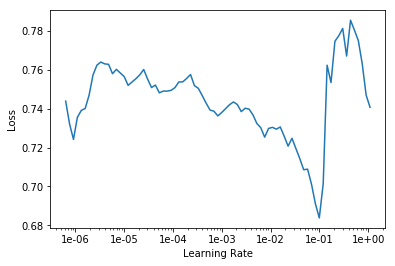

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.704864    0.660660    0.610039  (00:08)
2      0.605499    0.659501    0.540541  (00:09)
3      0.634603    0.663182    0.544402  (00:08)
4      0.589076    0.602179    0.671815  (00:09)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:42
epoch  train_loss  valid_loss  accuracy
1      0.566638    0.503539    0.818533  (00:24)
2      0.570877    0.504863    0.783784  (00:22)
3      0.587997    0.478027    0.830116  (00:19)
4      0.541795    0.378052    0.876448  (00:21)
5      0.492868    0.379478    0.880309  (00:25)
6      0.433169    0.360802    0.880309  (00:24)
7      0.389199    0.358134    0.876448  (00:25)
8      0.375281    0.315395    0.907336  (00:24)
9      0.410586    0.287974    0.903475  (00:21)
10     0.442650    0.343539    0.864865  (00:20)
11     0.361815    0.285886    0.915058  (00:25)
12     0.415361    0.272078    0.903475  (00:20)
13     0.352008    0.297473    0.899614  (00:23)
14     0.311325    0.303953    0.884170  (00:24)
15     0.317245    0.456182    0.818533  (00:25)
16     0.325852    0.317432    0.891892  (00:22)
17     0.329259    0.285612    0.861004  (00:22)
18     0.303885    0.257947    0.888031  (00:23)
19     0.329326    0.252884    0.911197  (00:20)
20     0.26

In [11]:
learn.validate()

[0.27268416, tensor(0.8996)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

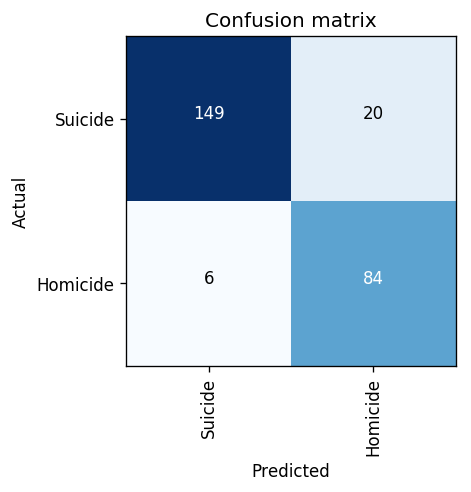

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

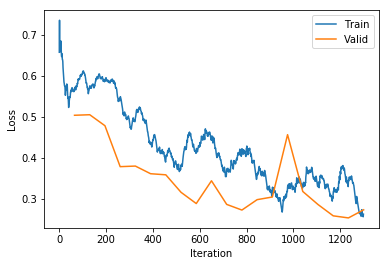

In [14]:
learn.recorder.plot_losses()

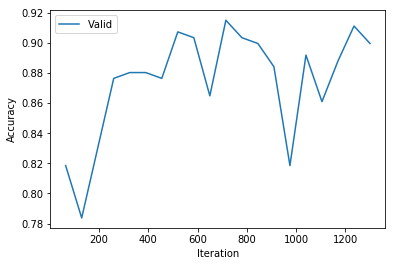

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


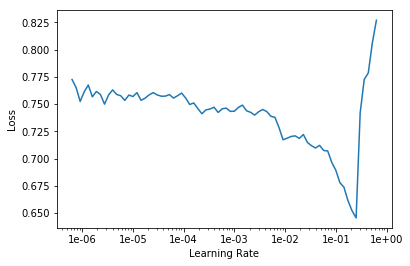

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.704530    0.631553    0.648649  (00:08)
2      0.715074    0.562395    0.779923  (00:07)
3      0.694025    0.646953    0.671815  (00:07)
4      0.665499    0.665999    0.598456  (00:08)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:45
epoch  train_loss  valid_loss  accuracy
1      0.632930    0.610985    0.664093  (00:22)
2      0.594160    0.614100    0.679537  (00:22)
3      0.584219    0.522765    0.768340  (00:22)
4      0.539018    0.524600    0.799228  (00:23)
5      0.536604    0.440199    0.822394  (00:19)
6      0.461241    0.658190    0.617761  (00:25)
7      0.480525    0.418270    0.841699  (00:21)
8      0.435046    0.397974    0.857143  (00:25)
9      0.406664    0.360705    0.888031  (00:23)
10     0.418832    0.543537    0.810811  (00:23)
11     0.401193    0.362935    0.907336  (00:23)
12     0.384065    0.371880    0.880309  (00:25)
13     0.363601    0.330540    0.888031  (00:23)
14     0.394272    0.318044    0.845560  (00:22)
15     0.324967    0.351157    0.845560  (00:23)
16     0.311604    0.317031    0.891892  (00:21)
17     0.276774    0.293743    0.891892  (00:24)
18     0.257071    0.297622    0.903475  (00:23)
19     0.294694    0.283190    0.880309  (00:21)
20     0.28

In [21]:
learn.validate()

[0.32011575, tensor(0.8764)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

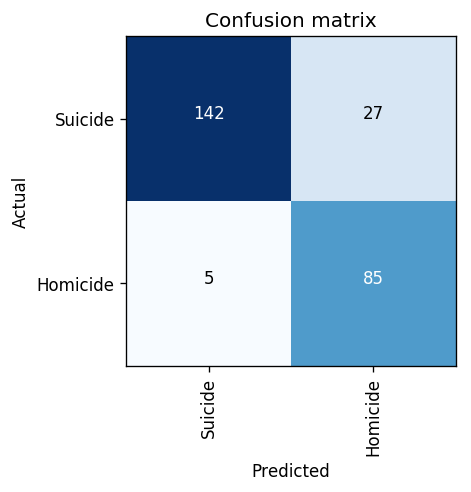

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

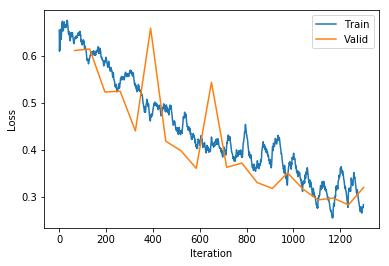

In [24]:
learn.recorder.plot_losses()

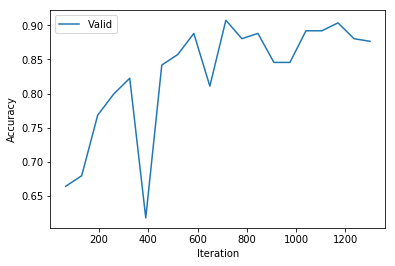

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


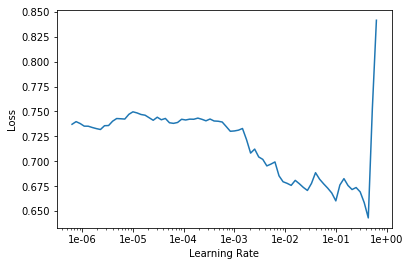

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.642609    0.586103    0.725869  (00:09)
2      0.610068    0.592280    0.702703  (00:09)
3      0.596749    0.568491    0.710425  (00:09)
4      0.606240    0.574715    0.691120  (00:07)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:22
epoch  train_loss  valid_loss  accuracy
1      0.604015    0.495420    0.795367  (00:21)
2      0.567752    0.432389    0.826255  (00:23)
3      0.592517    0.518635    0.776062  (00:19)
4      0.529620    0.370903    0.864865  (00:25)
5      0.532776    0.377128    0.864865  (00:22)
6      0.472987    0.385407    0.853282  (00:23)
7      0.482837    0.359650    0.849421  (00:19)
8      0.438803    0.319662    0.876448  (00:23)
9      0.468849    0.326255    0.899614  (00:19)
10     0.422345    0.312168    0.891892  (00:22)
11     0.434179    0.331894    0.891892  (00:20)
12     0.416145    0.340820    0.872587  (00:19)
13     0.352027    0.299258    0.880309  (00:23)
14     0.312400    0.315487    0.861004  (00:25)
15     0.307126    0.282206    0.891892  (00:25)
16     0.384242    0.447208    0.822394  (00:18)
17     0.385752    0.331088    0.857143  (00:19)
18     0.385718    0.334197    0.849421  (00:19)
19     0.305171    0.259025    0.903475  (00:24)
20     0.27

In [31]:
learn.validate()

[0.28795, tensor(0.8958)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

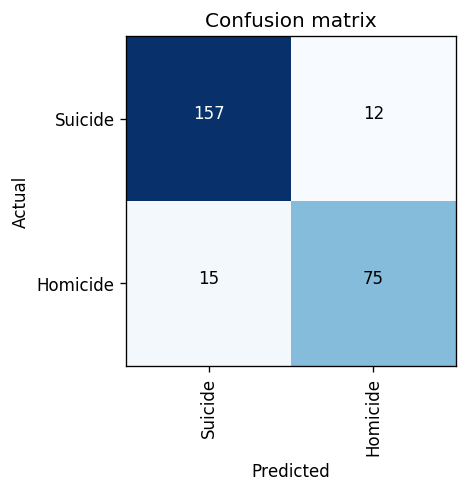

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

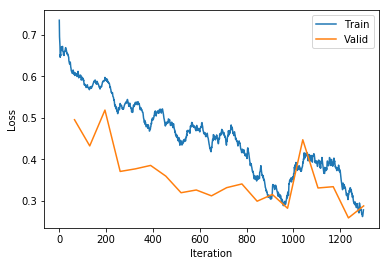

In [34]:
learn.recorder.plot_losses()

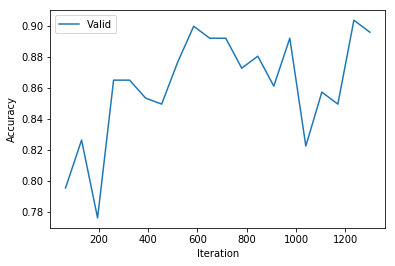

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


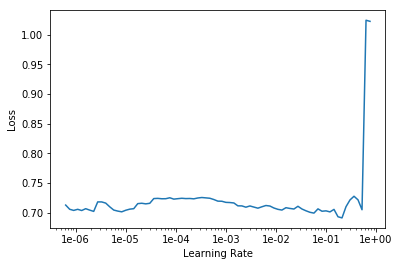

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.689604    0.684379    0.606178  (00:07)
2      0.633328    0.653879    0.571429  (00:08)
3      0.555846    0.608683    0.637066  (00:09)
4      0.573440    0.647522    0.621622  (00:08)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:41
epoch  train_loss  valid_loss  accuracy
1      0.584799    0.565916    0.737452  (00:23)
2      0.533161    0.460829    0.822394  (00:26)
3      0.531034    0.463154    0.822394  (00:24)
4      0.550062    0.429428    0.849421  (00:19)
5      0.506467    0.408979    0.853282  (00:22)
6      0.457585    0.420444    0.841699  (00:24)
7      0.423415    0.396674    0.891892  (00:25)
8      0.419791    0.313792    0.903475  (00:23)
9      0.459869    0.271552    0.899614  (00:19)
10     0.418100    0.322777    0.903475  (00:24)
11     0.379338    0.308865    0.872587  (00:24)
12     0.367410    0.351308    0.864865  (00:24)
13     0.378238    0.270895    0.899614  (00:20)
14     0.356270    0.279956    0.876448  (00:22)
15     0.377654    0.257689    0.895753  (00:19)
16     0.318216    0.287180    0.903475  (00:24)
17     0.300259    0.357448    0.872587  (00:23)
18     0.298671    0.254935    0.911197  (00:25)
19     0.368672    0.265292    0.884170  (00:19)
20     0.31

In [41]:
learn.validate()

[0.25066888, tensor(0.9035)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

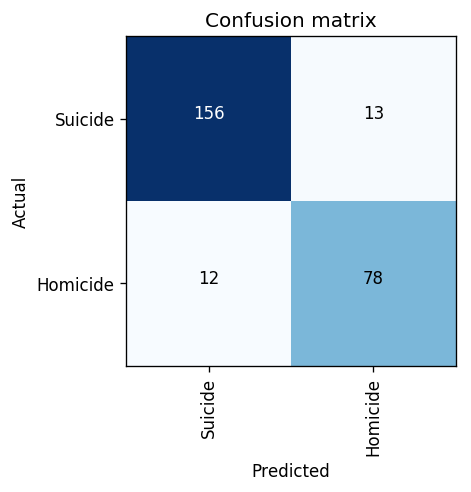

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

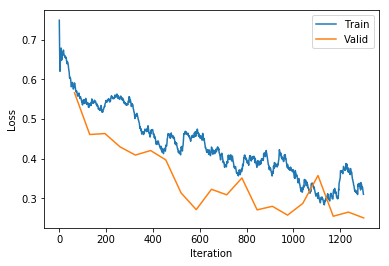

In [44]:
learn.recorder.plot_losses()

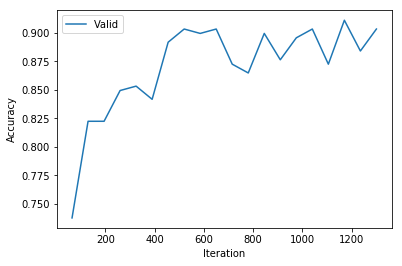

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


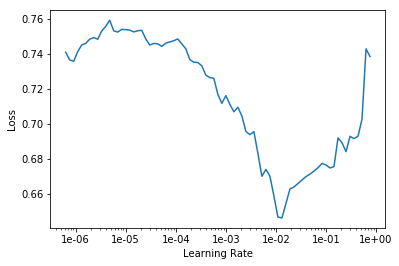

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.677947    0.689750    0.521236  (00:08)
2      0.642990    0.695222    0.513514  (00:08)
3      0.656835    0.701082    0.501930  (00:08)
4      0.653193    0.659735    0.586873  (00:07)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:16
epoch  train_loss  valid_loss  accuracy
1      0.659959    0.531319    0.764479  (00:19)
2      0.569396    0.593127    0.698842  (00:24)
3      0.568230    0.535633    0.729730  (00:21)
4      0.598489    0.444665    0.830116  (00:19)
5      0.553131    0.563602    0.691120  (00:22)
6      0.541342    0.486123    0.826255  (00:19)
7      0.531880    0.525463    0.772201  (00:19)
8      0.494873    0.430406    0.830116  (00:20)
9      0.419470    0.461581    0.791506  (00:23)
10     0.408113    0.385998    0.861004  (00:24)
11     0.405711    0.439836    0.822394  (00:22)
12     0.400875    0.331080    0.864865  (00:24)
13     0.378124    0.318893    0.884170  (00:22)
14     0.395958    0.406249    0.826255  (00:20)
15     0.386591    0.341136    0.864865  (00:21)
16     0.359885    0.362717    0.849421  (00:22)
17     0.329571    0.441809    0.814672  (00:24)
18     0.315851    0.421441    0.833977  (00:23)
19     0.353063    0.346237    0.857143  (00:19)
20     0.39

In [51]:
learn.validate()

[0.27437255, tensor(0.9035)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

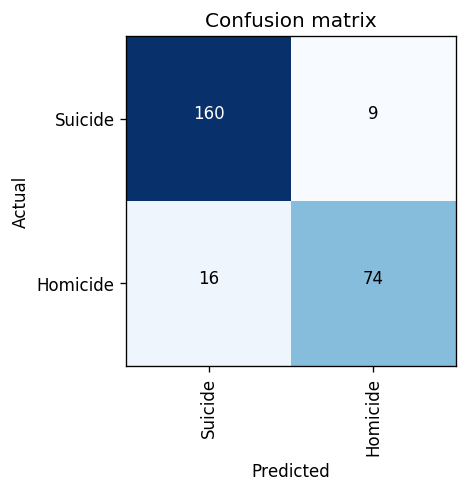

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

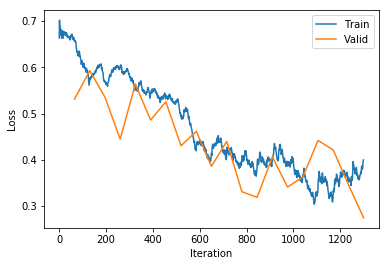

In [54]:
learn.recorder.plot_losses()

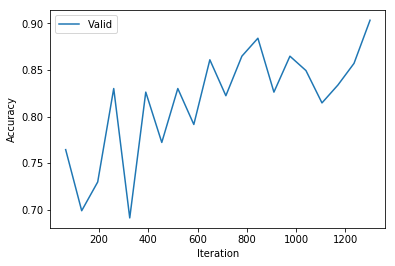

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8996139168739319, 0.876447856426239, 0.8957529067993164, 0.9034749269485474, 0.9034749269485474]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.8957529067993164


In [58]:
print(statistics.variance(accuracy_list))

0.0001267128897683989


In [59]:
import torch

torch.cuda.empty_cache()